In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

### Links used
- https://stackoverflow.com/questions/47557563/lemmatization-of-all-pandas-cells
- https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe

In [63]:
df = pd.read_csv('posts_all.csv', header=None)
df.columns = ['category','content']
print(len(df.index))

799


In [64]:
df.drop_duplicates(inplace=True)
print(len(df.index))

711


In [65]:
df.dropna(how='all',inplace=True)
print(len(df.index))

711


In [66]:
df.head(2)

,category,content
0,relationships,Previous post: LINK TL;DR: I'm pretty sure I g...
1,relationships,Situation: I worked hard to rise from humble b...


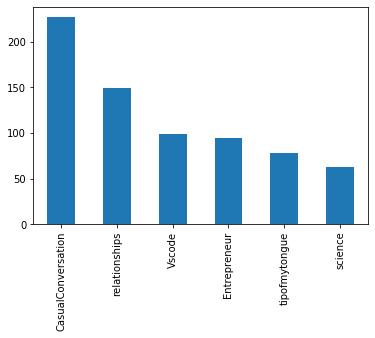

In [67]:
df.category.value_counts().plot(kind='bar')


In [68]:
# Let's improve the dataset

In [69]:
nltk.data.path.append("nltk-data")

In [70]:
# Lemmatize

In [71]:
nltk.download("wordnet", download_dir="nltk-data")

[nltk_data] Downloading package wordnet to nltk-data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [72]:
nltk.download("stopwords", download_dir="nltk-data")

[nltk_data] Downloading package stopwords to nltk-data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [74]:
lemmatizer = nltk.WordNetLemmatizer() 

In [75]:
stop = nltk.corpus.stopwords.words('english')
stop[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [76]:
def preprosess_text(text):
    #remove special chars
    text = re.sub(r'\W+', ' ', text)
    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 
    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    # Removing prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    # Converting to Lowercase
    text = text.lower()
    #lemmatize
    words = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    #stopwords
    words = [item for item in words if item not in stop]
    return ' '.join(words)


In [77]:
df['content'] = df.content.apply(preprosess_text)


In [78]:
df['content'].head(2)

0    previous post link tl dr pretty sure got direc...
1    situation worked hard rise humble beginning ge...
Name: content, dtype: object

In [79]:
df.to_csv('posts_all_filtered.csv',index=None, header=None)